### AI Prototype: Predicting the Effectiveness of Different Seating Arrangements on Student Performance
This project predicts how different seating arrangements affect student post-test scores using AI models and provides intelligent visualizations.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy import stats
import math

### Step 1: Data Creation
We will generate the dataset where:

- Pre-test comes from the square seating arrangement.
- Each student has four post-tests for different seating arrangements (Circle, Semi-circle, Triangle, Trapezoid).

In [2]:
# Step 1: Create a dataset where pre-test is in Square, and post-tests are in other seating arrangements
np.random.seed(42)
students = ['Student ' + str(i) for i in range(1, 101)]
seating_arrangements = ['Circle', 'Semi-circle', 'Triangle', 'Trapezoid']
performance_boost = {
    'Circle': 1.05, 
    'Semi-circle': 1.03, 
    'Triangle': 0.98, 
    'Trapezoid': 1.02
}

data = []
for student_name in students:
    pre_score = np.random.randint(50, 80)  # Pre-test score from Square seating
    for seating in seating_arrangements:
        post_score = int(pre_score * performance_boost[seating] + np.random.randint(-5, 6))
        post_score = min(post_score, 100)
        data.append([student_name, pre_score, post_score, seating])

df = pd.DataFrame(data, columns=['Name', 'PreTestScore', 'PostTestScore', 'SeatingArrangement'])

# View the first few rows of the data
df.head()


,Name,PreTestScore,PostTestScore,SeatingArrangement
0,Student 1,56,56,Circle
1,Student 1,56,62,Semi-circle
2,Student 1,56,56,Triangle
3,Student 1,56,56,Trapezoid
4,Student 2,56,62,Circle


### Step 2: Data Preparation for Machine Learning
We'll encode categorical variables and split the data into training and testing sets for the AI models.

In [3]:
# Step 2: Prepare the dataset for ML (one-hot encoding for seating arrangement)
df_encoded = pd.get_dummies(df, columns=['SeatingArrangement'], drop_first=True)

X = df_encoded.drop(['Name', 'PostTestScore'], axis=1)
y = df_encoded['PostTestScore']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: AI Models - Regression and Classification
We will build two models:

- 1. Regression Model: Predicts post-test scores based on pre-test scores and seating arrangements.
- 2. Classification Model: Classifies whether a student's post-test performance is "Good" or "Needs Improvement."

#### Regression Model

In [4]:
# Step 4: Build and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Mean Squared Error for Regression Model: {mse:.2f}")


Mean Squared Error for Regression Model: 10.94


#### Classification Model

In [5]:
# Step 5: Classify the results as 'Good' or 'Needs Improvement'
# Classify based on PostTestScore and define PerformanceCategory
df['PerformanceCategory'] = df['PostTestScore'].apply(lambda x: 'Good' if x > 70 else 'Needs Improvement')

# Convert the categorical target (PerformanceCategory) into binary values (1 = Good, 0 = Needs Improvement)
y_classification = pd.get_dummies(df['PerformanceCategory'], drop_first=True)

# Prepare train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Ensure the target variable is 1D by flattening the array
y_train_class = y_train_class.values.ravel()

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = clf.predict(X_test_class)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy:.2f}")



Classification Accuracy: 0.88


### Step 4: Intelligent Visualizations with AI Predictions
We’ll visualize seating arrangements and their effects on post-test performance using AI models.

#### Visualization 1: Average Post-Test Scores by Seating Arrangement

C:\Users\Bron\AppData\Local\Temp\ipykernel_16328\2816577745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SeatingArrangement', y='PostTestScore', data=df, palette='coolwarm')


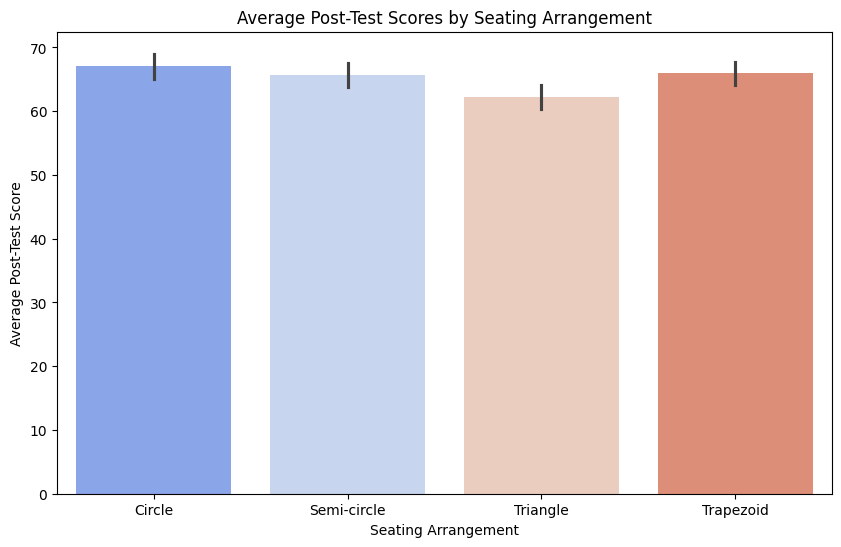

In [6]:
# Step 6: Visualization of seating arrangements with AI
plt.figure(figsize=(10,6))
sns.barplot(x='SeatingArrangement', y='PostTestScore', data=df, palette='coolwarm')
plt.title('Average Post-Test Scores by Seating Arrangement')
plt.ylabel('Average Post-Test Score')
plt.xlabel('Seating Arrangement')
plt.show()


#### Visualization 2: Predicted Performance by Seating Arrangement

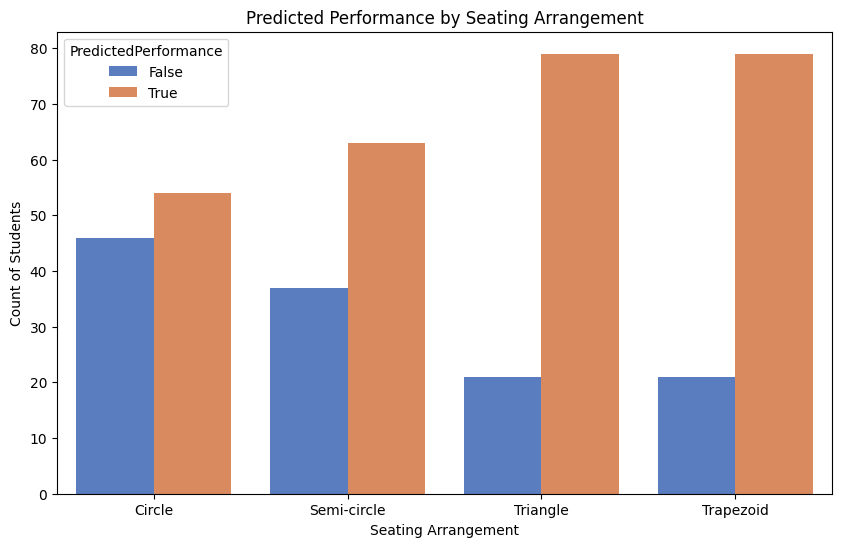

In [7]:
# Adding predictions for classification to the dataframe
df['PredictedPerformance'] = clf.predict(X)

# Plotting the results
plt.figure(figsize=(10,6))
sns.countplot(x='SeatingArrangement', hue='PredictedPerformance', data=df, palette='muted')
plt.title('Predicted Performance by Seating Arrangement')
plt.xlabel('Seating Arrangement')
plt.ylabel('Count of Students')
plt.show()


#### Visualization 3: Heatmap of Post-Test Scores by Student and Seating Arrangement

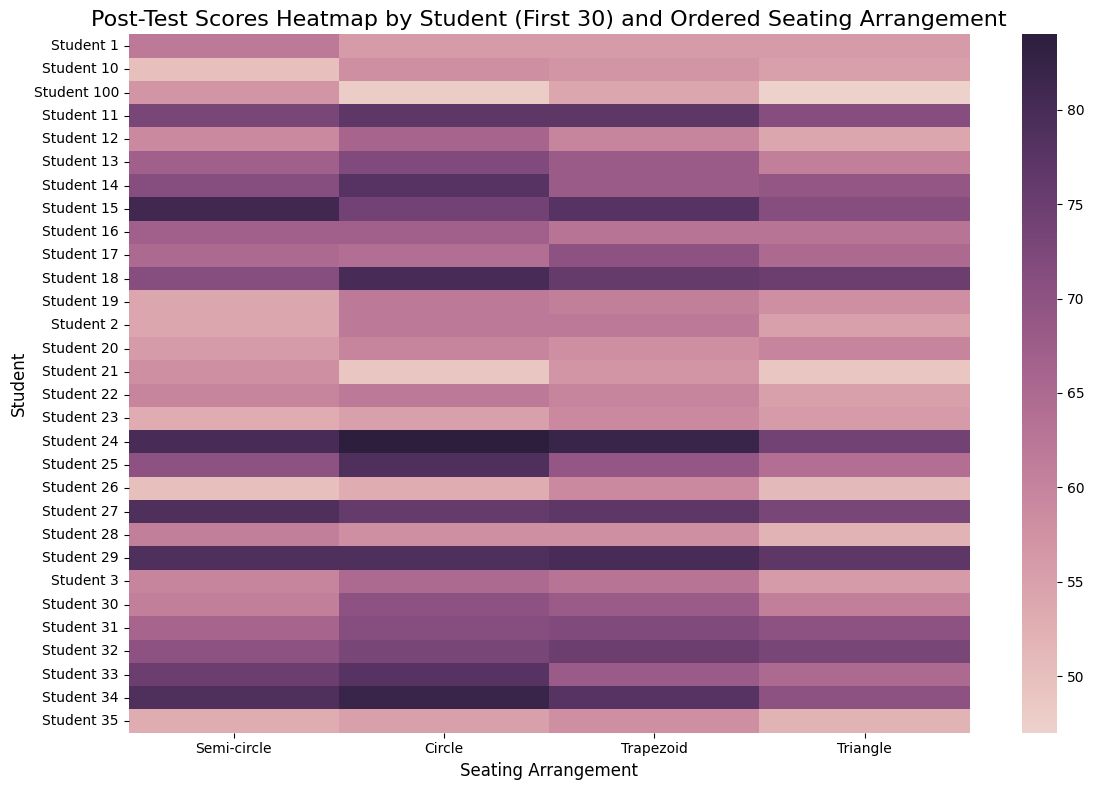

In [8]:
# Create a pivot table to organize the data by seating arrangement and student
seating_order = ['Semi-circle', 'Circle', 'Trapezoid', 'Triangle']  # Ensuring a proper seating order

# Subset for the first 30 students for better readability
subset_df = df.pivot_table(values='PostTestScore', index='Name', columns='SeatingArrangement').head(30)

# Reorder the seating arrangement columns for better clarity
subset_df = subset_df[seating_order]

# Set figure size
plt.figure(figsize=(12, 8))

# Create the heatmap using Cubehelix palette with ordered seating arrangement
# sns.heatmap(subset_df, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidths=0.5, linecolor='white', cbar_kws={'label': 'Post-Test Score'}, annot_kws={"size": 10})
sns.heatmap(subset_df, cmap=sns.cubehelix_palette(as_cmap=True))

# Title and axis labels
plt.title('Post-Test Scores Heatmap by Student (First 30) and Ordered Seating Arrangement', fontsize=16)
plt.ylabel('Student', fontsize=12)
plt.xlabel('Seating Arrangement', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


### Step 5: Statistical Significance - Paired T-Test and Cohen's D
We'll compute paired t-tests and Cohen's d effect size for the pre-test (Square) against each post-test seating arrangement.

In [9]:
# Task 1: Perform Paired t-test and Cohen's d
seating_arrangements = ['Circle', 'Semi-circle', 'Triangle', 'Trapezoid']
pre_test_scores = df[df['SeatingArrangement'] == 'Circle']['PreTestScore']

for seating in seating_arrangements:
    post_test_scores = df[df['SeatingArrangement'] == seating]['PostTestScore']
    
    # Paired t-test
    t_stat, p_value = stats.ttest_rel(pre_test_scores, post_test_scores)
    
    # Cohen's d
    mean_diff = np.mean(pre_test_scores) - np.mean(post_test_scores)
    pooled_std = math.sqrt(((np.std(pre_test_scores) ** 2) + (np.std(post_test_scores) ** 2)) / 2)
    cohen_d = mean_diff / pooled_std
    
    print(f"\nSeating Arrangement: {seating}")
    print(f"Paired t-test p-value: {p_value:.4f}")
    print(f"Cohen's d (Effect size): {cohen_d:.4f}")



Seating Arrangement: Circle
Paired t-test p-value: 0.0000
Cohen's d (Effect size): -0.2496

Seating Arrangement: Semi-circle
Paired t-test p-value: 0.0035
Cohen's d (Effect size): -0.1036

Seating Arrangement: Triangle
Paired t-test p-value: 0.0000
Cohen's d (Effect size): 0.2612

Seating Arrangement: Trapezoid
Paired t-test p-value: 0.0001
Cohen's d (Effect size): -0.1541


### Step 6: Predict Post-Test Scores for a Specific Student
This step allows us to predict what the post-test score for a specific student will be based on their pre-test score and seating arrangement.

In [10]:
# Task 2: Predict post-test scores for a specific student
def predict_post_test(pre_test_score, seating_arrangement, reg_model, feature_columns):
    # Initialize input data with the correct structure
    input_data = {
        'PreTestScore': [pre_test_score]
    }
    
    # Add all seating arrangement columns initialized to 0
    for seating in ['SeatingArrangement_Circle', 'SeatingArrangement_Semi-circle', 'SeatingArrangement_Triangle', 'SeatingArrangement_Trapezoid']:
        input_data[seating] = [1 if seating == f'SeatingArrangement_{seating_arrangement}' else 0]
    
    # Convert the input data into a DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Reorder columns to match the feature columns used during training
    input_df = input_df.reindex(columns=feature_columns, fill_value=0)
    
    # Use the trained regression model to predict the post-test score
    predicted_post_test_score = reg_model.predict(input_df)
    
    return predicted_post_test_score[0]

# Example: Predicting post-test scores for 'Student 1' with a pre-test score of 65
pre_test_score = 65
seating_arrangements = ['Circle', 'Semi-circle', 'Triangle', 'Trapezoid']

# Assuming 'feature_columns' contains the exact feature columns used in the training
feature_columns = X_train.columns  # This contains the correct feature names from training

# Predicting for each seating arrangement
for seating in seating_arrangements:
    predicted_score = predict_post_test(pre_test_score, seating, reg_model, feature_columns)
    print(f"Predicted Post-Test Score for {seating} seating arrangement: {predicted_score:.2f}")


Predicted Post-Test Score for Circle seating arrangement: 67.32
Predicted Post-Test Score for Semi-circle seating arrangement: 65.98
Predicted Post-Test Score for Triangle seating arrangement: 62.66
Predicted Post-Test Score for Trapezoid seating arrangement: 66.46


### Step 7: Export Data to CSV
We’ll export the final data to CSV for use in analytics dashboarding tools like PowerBI and Tableau.

In [11]:
# Export the final data frame to CSV for use in other dashboarding tools
df.to_csv('ai_project_results.csv', index=False)
